##  Case study: Unsupervised Learning
----------------------------------------

Welcome to the case study on Unsupervised Learning. We will be using a company's Customer Data for this case study.

----------------------------
## Problem Statement: 
-----------------------------
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

----------------------------
## Objective: 
-----------------------------

Need to perform clustering to summarize customer segments.


--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

People:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise



Products:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years



Promotion:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



Place:
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Importing libraries and overview of the dataset

In [93]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install scikit-learn-extra



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**

- There are 2240 observations and 29 columns in the dataset.
- Just the Income column has 24 missing values
- All columns are object, int64, and float64 data type.

In [5]:
df.loc[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [6]:
# Drop rows with missing values in the 'Income' column

df.dropna(subset=['Income'], inplace=True)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Pre-Processing

In [9]:
df.Kidhome.value_counts()

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

-  Replacing entries in the Education and Marital_status columns that have similar meanings

In [10]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
# Replace certain entries in the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace({'Together': 'Married', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})
df.Marital_Status.unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [13]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

-  Creating the age columns from the Year_birth Column

In [14]:
# Convert 'Year_Birth' to datetime format
df['Year'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Get the current year
current_year = datetime.now().year

# Calculate age by subtracting birth year from current year
df['Age'] = current_year - df['Year'].dt.year

# Display the DataFrame with the new 'Age' column
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1957-01-01,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,1954-01-01,70
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,1965-01-01,59
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1984-01-01,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1981-01-01,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1967-01-01,57
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,1946-01-01,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1981-01-01,43
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,1956-01-01,68


In [15]:
df.drop(columns=['Year'], inplace=True)


-  Checking for Outliers

In [16]:

def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)

print_outliers(df['Age'])
print_outliers(df['Income'])

Outliers in Age:
192    124
239    131
339    125
Name: Age, dtype: int32
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


-  REMOVING OUTLIERS

In [17]:

def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(df['Age'])
no_outliers_income = remove_outliers(df['Income'])
df = df[(df['Age'].isin(no_outliers_age)) & (df['Income'].isin(no_outliers_income))]
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
770,10582,1979,Graduation,Married,72063.0,0,1,03-07-2013,3,180,...,0,0,0,0,0,0,3,11,0,45
868,8687,1978,Graduation,Married,53172.0,0,1,06-05-2013,54,121,...,0,0,0,0,0,0,3,11,0,46
1022,6059,1953,PhD,Married,64504.0,1,2,04-03-2013,81,986,...,0,0,0,0,0,0,3,11,1,71
857,425,1985,Graduation,Married,55357.0,2,0,19-02-2013,66,374,...,0,0,0,0,0,0,3,11,0,39
708,3336,1948,PhD,Married,66375.0,0,1,21-11-2013,96,712,...,1,0,0,0,0,0,3,11,0,76
1885,10702,1984,Graduation,Single,52413.0,1,0,03-11-2012,67,185,...,0,0,0,0,0,0,3,11,0,40
2203,2736,1978,Graduation,Married,73807.0,0,1,02-01-2013,88,366,...,0,0,0,0,0,0,3,11,0,46
386,6720,1968,Master,Married,43795.0,0,1,16-10-2013,11,314,...,0,1,0,0,0,0,3,11,1,56
540,3665,1977,Master,Married,25315.0,1,0,07-11-2013,46,1,...,0,0,0,0,0,0,3,11,0,47
1637,10711,1945,Graduation,Married,69755.0,0,0,02-10-2013,23,217,...,0,0,0,0,0,0,3,11,0,79


# Exploratory Data Analysis

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


#### Summary Statistics

**Observations:**

- The average Income has a high range as it has a minimum value of 1K and a maximum value of 100K.
- The mean of the Income is approx 51.6K with a large standard deviation of 20.7K.
- The average age is approx 55 (rounding off to nearest integer).
- On average, a customer hasnt purchased from the company in 49 years, 5 web visits, and made 6 store visits. 

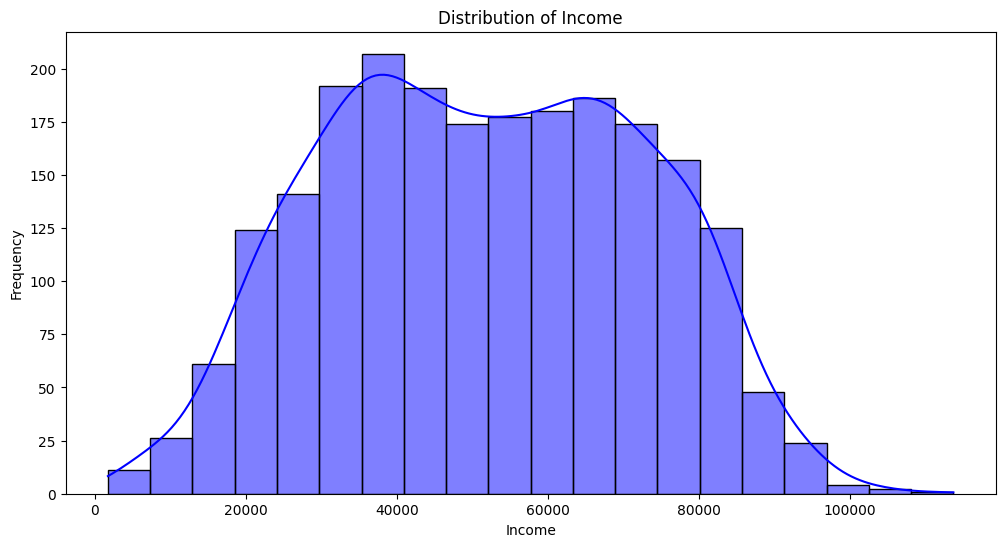

In [19]:
# Distribution of numerical variables

plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

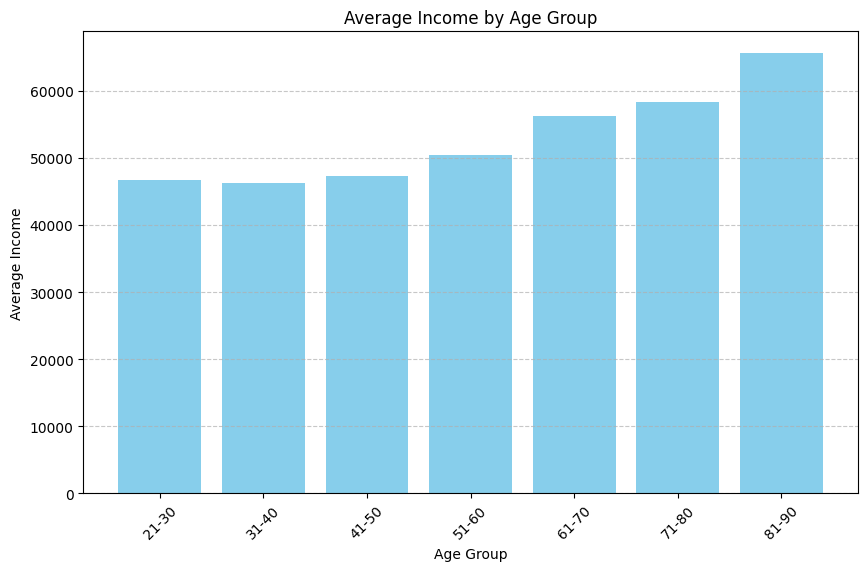

In [20]:
# Define age bins
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]  # Define age bins
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']  # Define labels for age groups

# Create 'Age_Group' column based on age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average income for each age group
average_income_by_age_group = df.groupby('Age_Group')['Income'].mean().reset_index()

# Plot the trend in income across age groups
plt.figure(figsize=(10, 6))
plt.bar(average_income_by_age_group['Age_Group'], average_income_by_age_group['Income'], color='skyblue')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

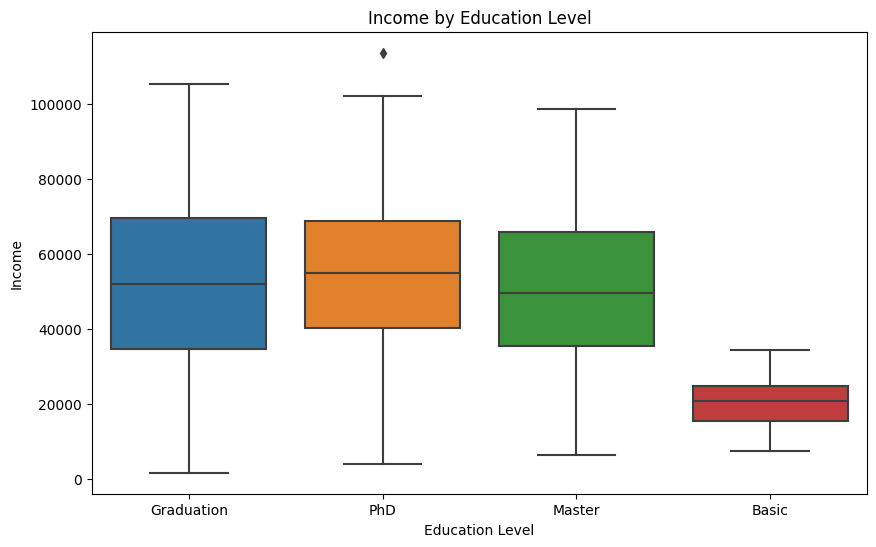

In [21]:
# Relationship between education and income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

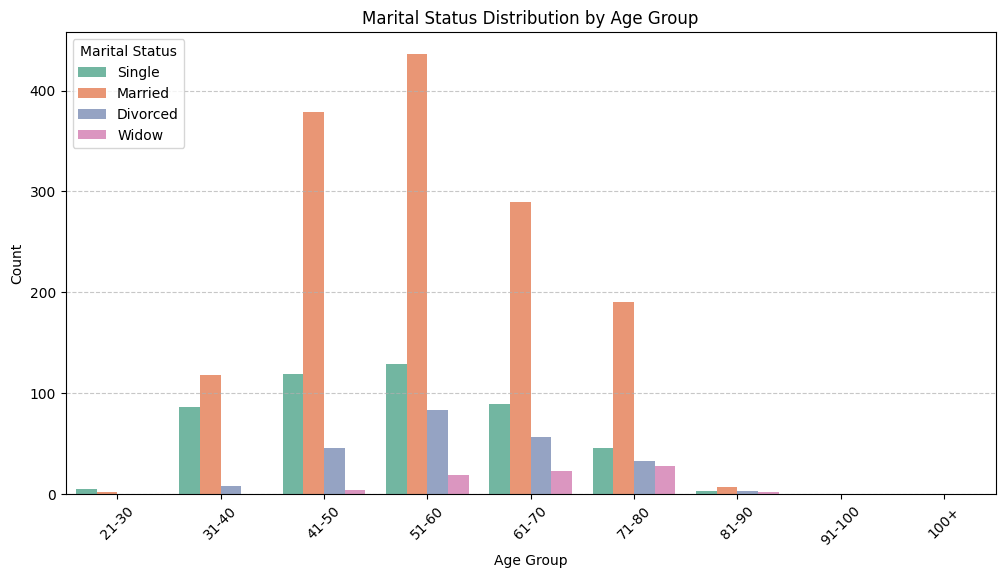

In [22]:
# Create a count plot of marital status by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_Group', hue='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Marital Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Customer Segmentation
-Label Encoding of Categorical variables for clustering purposes


In [112]:
df_copy = df.copy()
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group'],
      dtype='object')

In [113]:
columns_to_drop = ['ID', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age_Group', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


df_copy = df_copy.drop(columns=columns_to_drop)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Recency              2205 non-null   int64  
 3   NumDealsPurchases    2205 non-null   int64  
 4   NumWebPurchases      2205 non-null   int64  
 5   NumCatalogPurchases  2205 non-null   int64  
 6   NumStorePurchases    2205 non-null   int64  
 7   NumWebVisitsMonth    2205 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 155.0 KB


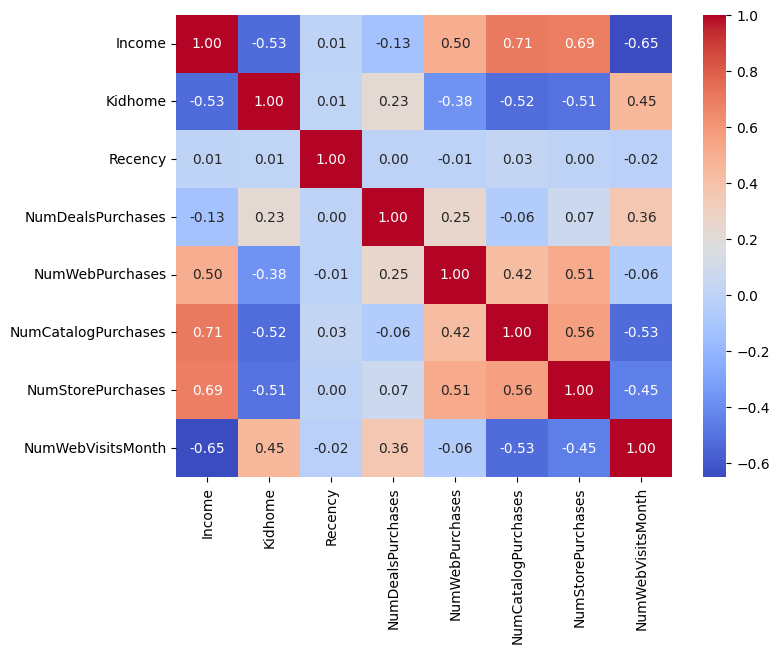

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df_copy.corr(), annot=True, fmt='0.2f', cmap = "coolwarm")
plt.show()

In [115]:
scaler=StandardScaler()
df_sc=pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

df_sc

,Income,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.314651,-0.823405,0.310830,0.361479,1.424772,2.628526,-0.562650,0.689203
1,-0.254877,1.038757,-0.380600,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645
2,0.965354,-0.823405,-0.795458,-0.699147,1.424772,-0.230646,1.288596,-0.554069
3,-1.206087,1.038757,-0.795458,-0.168834,-0.767567,-0.945440,-0.562650,0.274779
4,0.322136,1.038757,1.555404,1.422105,0.328602,0.126750,0.054432,-0.139645
...,...,...,...,...,...,...,...,...
2200,0.463624,-0.823405,-0.104028,-0.168834,1.790162,0.126750,-0.562650,-0.139645
2201,0.598401,2.900920,0.241687,2.482731,1.424772,-0.230646,-0.254109,0.689203
2202,0.258780,-0.823405,1.451690,-0.699147,-0.767567,0.126750,2.214218,0.274779
2203,0.851004,-0.823405,-1.417746,-0.168834,0.693992,0.841543,1.288596,-0.968493


In [116]:
df_sc.isna().sum()

Income                 0
Kidhome                0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

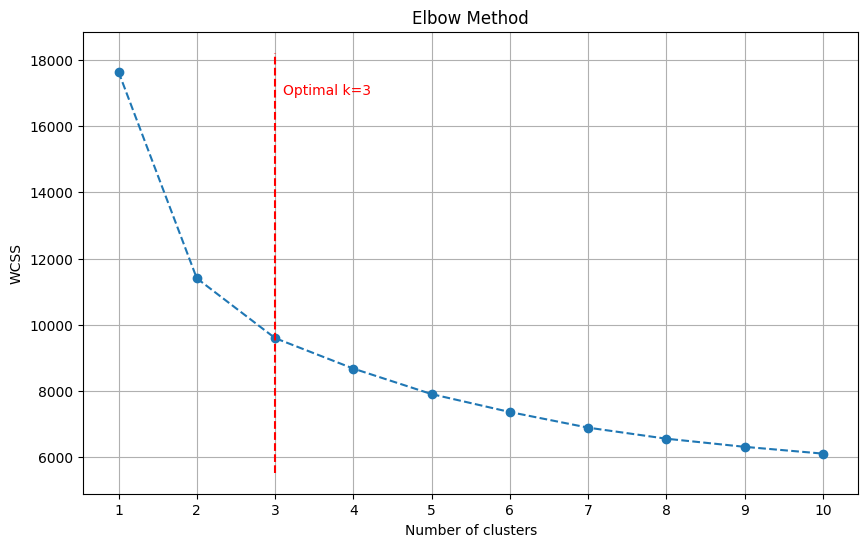

Optimal number of clusters (k): 3


In [117]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate for a range of Ks and fit the scaled data to the KMeans algorithm
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_sc)  # Assuming df_sc contains your scaled data
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)

# Find the value of k that maximizes the elbow curve
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Plot the optimal k value on the graph
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.text(optimal_k + 0.1, plt.ylim()[1] * 0.9, f'Optimal k={optimal_k}', color='red')

plt.show()

print("Optimal number of clusters (k):", optimal_k)


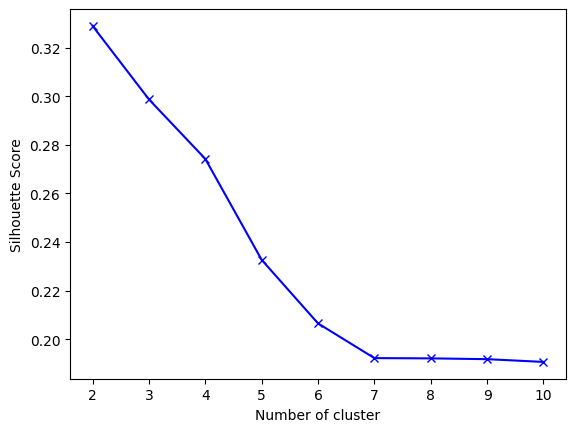

In [118]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_sc)
    labels = kmeans.labels_
    sc[k] = silhouette_score(df_sc, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

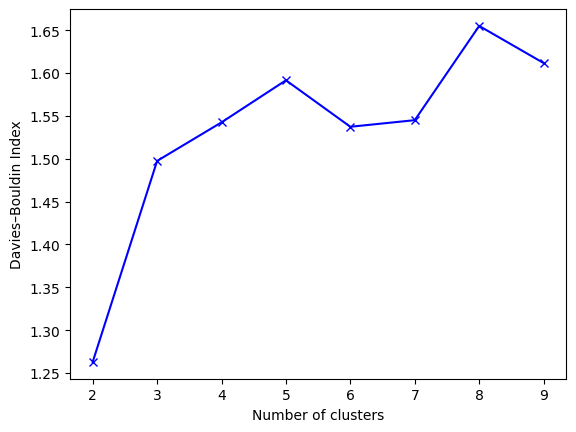

Optimal number of clusters based on Davies–Bouldin Index: 2


In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Empty dictionary to store the Davies–Bouldin Index for each value of k
dbi_scores = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Davies–Bouldin Index for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_sc)  # Assuming df_sc contains your scaled data
    labels = kmeans.labels_
    dbi_scores[k] = davies_bouldin_score(df_sc, labels)

# Plot the Davies–Bouldin Index for different values of k
plt.figure()
plt.plot(list(dbi_scores.keys()), list(dbi_scores.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Davies–Bouldin Index")
plt.show()

# Find the value of k that minimizes the Davies–Bouldin Index
optimal_k = min(dbi_scores, key=dbi_scores.get)
print(f"Optimal number of clusters based on Davies–Bouldin Index: {optimal_k}")


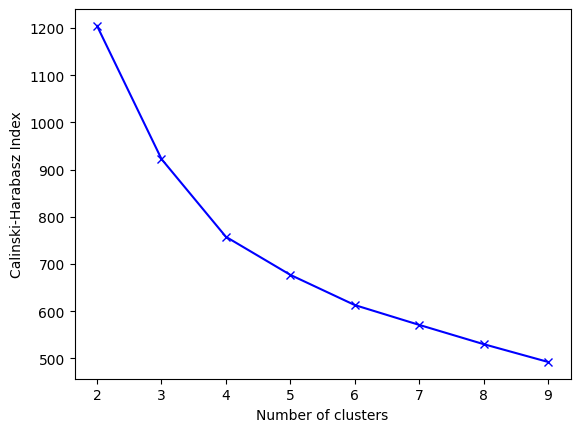

Maximum number of clusters based on Calinski-Harabasz Index: 2


In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Empty dictionary to store the Calinski-Harabasz Index for each value of k
chi_scores = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Calinski-Harabasz Index for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_sc)  # Assuming df_sc contains your scaled data
    labels = kmeans.labels_
    chi_scores[k] = calinski_harabasz_score(df_sc, labels)

# Plot the Calinski-Harabasz Index for different values of k
plt.figure()
plt.plot(list(chi_scores.keys()), list(chi_scores.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

# Find the value of k that maximizes the Calinski-Harabasz Index
optimal_k = max(chi_scores, key=chi_scores.get)
print(f"Maximum number of clusters based on Calinski-Harabasz Index: {optimal_k}")


# Executing the clustering algorithm

In [121]:
# Define the number of clusters (K)
k = 3  # You can choose the optimal K value determined previously

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(df_sc)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_copy['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_copy.head()


,Income,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster
0,58138.0,0,58,3,8,10,4,7,2
1,46344.0,1,38,2,1,1,2,5,0
2,71613.0,0,26,1,8,2,10,4,1
3,26646.0,1,26,2,2,0,4,6,0
4,58293.0,1,94,5,5,3,6,5,2


In [122]:
df_copy['Cluster'].value_counts()

Cluster
0    965
1    751
2    489
Name: count, dtype: int64

After fitting the KMeans model, the centroids of each cluster are obtained using the kmeans.cluster_centers_ attribute. These centroids represent the mean values of the features for each cluster. 


-it gives values under each feature which represent the centroids of each cluster for the corresponding feature

-Each value under each feature in the centroid DataFrame represents the average or mean value of that feature within a particular cluster.

-These centroid values provide a summary of the typical characteristics, behaviors, and demographics of customers within each cluster, helping to distinguish between the clusters based on these attributes.

In [123]:
df_copy.groupby("Cluster").mean().style.highlight_max(color="lightgreen")

,Income,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,
0,33572.508808,0.801036,49.212435,1.923316,2.017617,0.496373,3.124352,6.502591
1,72891.583222,0.025300,49.350200,1.371505,5.094541,5.376831,8.383489,2.980027
2,54576.010225,0.374233,48.083845,4.552147,6.685072,2.691207,7.218814,6.656442


In [124]:
df_copy.groupby("Cluster").mean().style.highlight_min(color="red")

,Income,Kidhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,
0,33572.508808,0.801036,49.212435,1.923316,2.017617,0.496373,3.124352,6.502591
1,72891.583222,0.025300,49.350200,1.371505,5.094541,5.376831,8.383489,2.980027
2,54576.010225,0.374233,48.083845,4.552147,6.685072,2.691207,7.218814,6.656442


### Cluster Profiles:

-  Cluster 0 - Low Income Customers: this cluster represents customers with the higher number of kids, lowest income earners, they scarcely purchase by catalogue nor by the store, they visit the store more but have the lowest number of purchases from the website


-  Cluster 1 - High Income Customers: this cluster represents customers with the highest income, they have fewer kids, they purchase from the store more often and also purchase more from catalogue and therefore they have less number of web visits


-  Cluster 2 - medium income Customers: these customers visit the website the most, hence they make the most web purchases and also have the highest number of purchases with discounts. 

# ITEM SEGMENTATION

-  Clustering the customers based on the items bought

In [83]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group'],
      dtype='object')

In [88]:
df_item = df.copy()

In [89]:
columns_to_drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age_Group', 'Response', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases', 'NumCatalogPurchases']


df_item = df_item.drop(columns=columns_to_drop)
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2205 non-null   float64
 1   Kidhome           2205 non-null   int64  
 2   MntWines          2205 non-null   int64  
 3   MntFruits         2205 non-null   int64  
 4   MntMeatProducts   2205 non-null   int64  
 5   MntFishProducts   2205 non-null   int64  
 6   MntSweetProducts  2205 non-null   int64  
 7   MntGoldProds      2205 non-null   int64  
 8   Age               2205 non-null   int32  
dtypes: float64(1), int32(1), int64(7)
memory usage: 163.7 KB


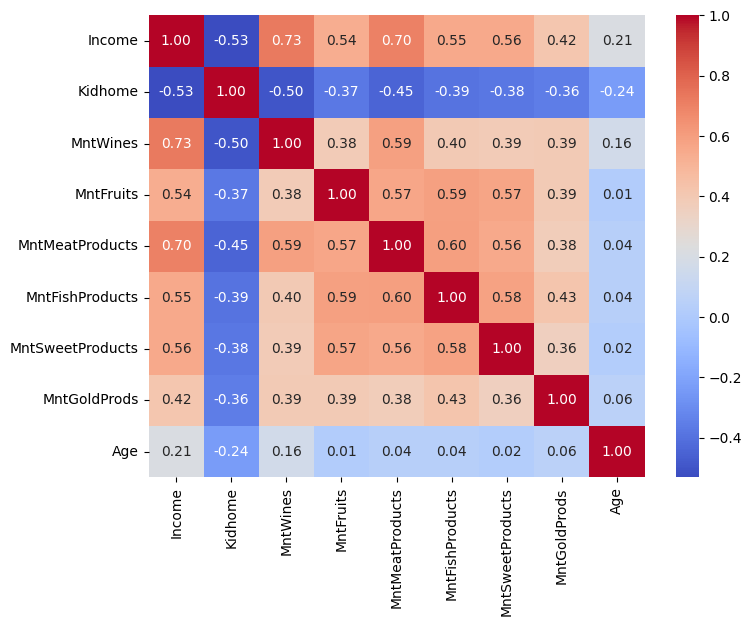

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(df_item.corr(), annot=True, fmt='0.2f', cmap = "coolwarm")
plt.show()

In [91]:
scaler=StandardScaler()
df_scale=pd.DataFrame(scaler.fit_transform(df_item), columns=df_item.columns)

df_scale

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,0.314651,-0.823405,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,1.017189
1,-0.254877,1.038757,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,1.273530
2,0.965354,-0.823405,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,0.333612
3,-1.206087,1.038757,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-1.289883
4,0.322136,1.038757,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,-1.033542
...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.823405,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,0.162718
2201,0.598401,2.900920,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,1.957107
2202,0.258780,-0.823405,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-1.033542
2203,0.851004,-0.823405,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,1.102636


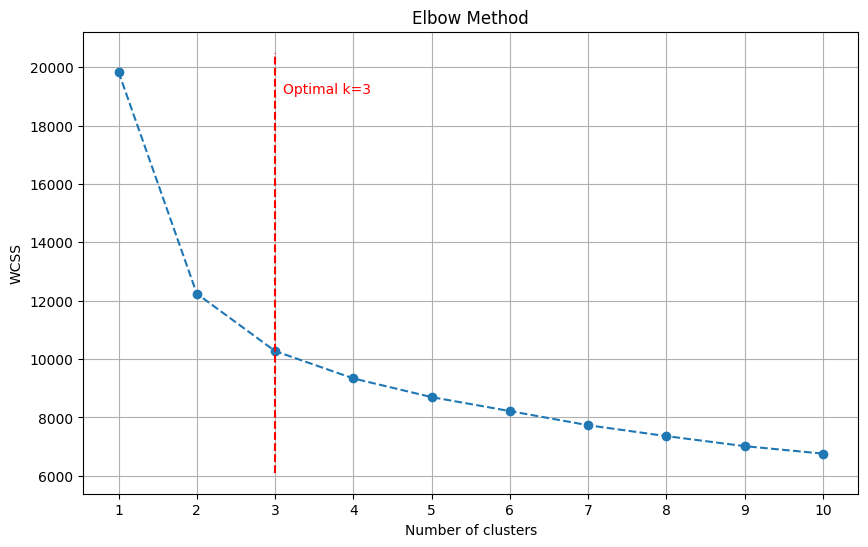

Optimal number of clusters (k): 3


In [94]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate for a range of Ks and fit the scaled data to the KMeans algorithm
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scale)  # Assuming df_sc contains your scaled data
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)

# Find the value of k that maximizes the elbow curve
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Plot the optimal k value on the graph
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.text(optimal_k + 0.1, plt.ylim()[1] * 0.9, f'Optimal k={optimal_k}', color='red')

plt.show()

print("Optimal number of clusters (k):", optimal_k)


In [99]:
# Define the number of clusters (K)
k = 3  # You can choose the optimal K value determined previously

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(df_scale)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_item['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_item.head()


,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Cluster
0,58138.0,0,635,88,546,172,88,88,67,2
1,46344.0,1,11,1,6,2,1,6,70,0
2,71613.0,0,426,49,127,111,21,42,59,1
3,26646.0,1,11,4,20,10,3,5,40,0
4,58293.0,1,173,43,118,46,27,15,43,0


In [100]:
df_item['Cluster'].value_counts()

Cluster
0    994
1    670
2    541
Name: count, dtype: int64

In [101]:
df_item.groupby("Cluster").mean().style.highlight_max(color="lightgreen")

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
Cluster,,,,,,,,,
0,34330.856137,0.899396,54.382294,5.453722,29.974849,7.631791,5.348089,16.737425,51.045272
1,58449.519403,0.073134,443.635821,17.101493,139.692537,26.246269,18.011940,52.519403,61.304478
2,74936.543438,0.059150,598.523105,76.414048,445.700555,107.360444,78.436229,83.772643,54.848429


In [102]:
df_item.groupby("Cluster").mean().style.highlight_min(color="red")

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
Cluster,,,,,,,,,
0,34330.856137,0.899396,54.382294,5.453722,29.974849,7.631791,5.348089,16.737425,51.045272
1,58449.519403,0.073134,443.635821,17.101493,139.692537,26.246269,18.011940,52.519403,61.304478
2,74936.543438,0.059150,598.523105,76.414048,445.700555,107.360444,78.436229,83.772643,54.848429


### Cluster Profiles:

-  Cluster 0 - Low Income Customers: this cluster represents customers with the higher number of kids, lowest income earners, they spend the least on the items, they are the youngest customer group


-  Cluster 1 - medioum Income Customers: this cluster represents customers with the moderately high income, they have fewer kids, they are the oldest customer group and they purchase more items compared to cluster 0


-  Cluster 2 - High income Customers: they have the least number of kids, they spend the most on goods purchases.